## 기본 환경 설정

필요한 패키지 설치하기

In [ ]:
!pip install transformers

colab에서 발생하는 한글 깨짐 현상을 해결해주는 코드로 아래의 코드를 실행하고 `런타임 다시 시작`을 해주어야 합니다.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

`런타임 다시 시작`을 해주면 한글이 깨지지 않게 됩니다.

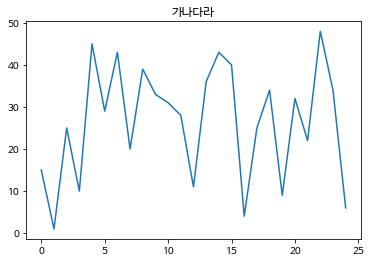

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 한글 지원 폰트
plt.rc('font', family='NanumBarunGothic')

# 마이너스 부호 
plt.rcParams['axes.unicode_minus'] = False

plt.plot(np.random.randint(1, 50, 25))
plt.title("가나다라")
plt.show()

현재 colab과 구글 드라이브를 연결하여 구글 드라이브에 있는 데이터를 불러오겠습니다.

In [34]:
import os, sys
from google.colab import drive

# 구글 드라이브와 코랩을 연결해줍니다.
drive.mount('/content/drive')
# 구글 드라이브에서 앞으로 작업할 위치로 경로를 이동합니다.
os.chdir('/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 불러오기

In [35]:
import pandas as pd
from glob import glob

우선 각 데이터가 존재하는 path를 가져옵니다.

In [70]:
now_path = os.getcwd()
print(f"현재 경로 : {now_path}")
data_folder_path = now_path + "/data"
print(f"데이터 폴더 경로 : {data_folder_path}")

data_folders = glob(data_folder_path + "/*")
tunib_data_folder = "".join([folder for folder in data_folders if "TUNiB" in folder.split("/")])
aihub_data_folder = "".join([folder for folder in data_folders if "TUNiB" not in folder.split("/")])

tunib_data_paths = glob(tunib_data_folder + "/*")
print(f"튜닙 데이터 경로내 파일들 {tunib_data_paths}")
aihub_data_paths = glob(aihub_data_folder + "/*")
print(f"AI_HUB 데이터 경로내 파일들 {aihub_data_paths}")

현재 경로 : /content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline
데이터 폴더 경로 : /content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data
튜닙 데이터 경로내 파일들 ['/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/TUNiB/sample_answersheet.json', '/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/TUNiB/train.csv', '/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/TUNiB/test.json']
AI_HUB 데이터 경로내 파일들 ['/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/AI_HUB/여권 최종본(0416).xlsx', '/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/AI_HUB/상수도_최종본(0416).xlsx', '/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/AI_HUB/차량등록_최종본(0429).xlsx', '/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/AI_HUB/교통_최종본(0416).xlsx', '/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/AI_HUB/A 음식점(15,726)_new.xlsx', '/content/drive/MyDrive/TUNiB준비반

### TUNiB 데이터 불러오기

TUNiB 데이터의 경우 훈련 데이터는 csv파일이고 테스트 데이터는 json파일이기 때문에 조건문을 통하여 pandas dataframe 타입으로 불러와줍니다.

In [95]:
import json

for data_path in tunib_data_paths:
  # TUNiB 훈련 데이터 불러오기
  if data_path.split(".")[-1] == "csv":
    tunib_train = pd.read_csv(data_path, index_col = [0], encoding="utf-8")

  # TUNiB 테스트 데이터 불러오기
  elif data_path.split(".")[-1] == "json":
    with open(data_path, "r", encoding="utf-8") as f:
      tunib_test = json.load(f)
    tunib_test = pd.DataFrame(tunib_test).T

In [96]:
print(f"TUNiB 훈련 데이터 개수 : {len(tunib_train)}")
print(tunib_train.head())
print("\n")
print(f"TUNiB 테스트 데이터 개수 : {len(tunib_test)}")
print(tunib_test.head())

TUNiB 훈련 데이터 개수 : 3950
         class                                       conversation
idx                                                              
0        협박 대화  지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1        협박 대화  길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2    기타 괴롭힘 대화  너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3        갈취 대화  어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4        갈취 대화  저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


TUNiB 테스트 데이터 개수 : 500
                                                    text
t_000  아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
t_001  우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때?  네? 제가요? ...
t_002  너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
t_003  이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...
t_004  아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...


TUNiB의 학습 데이터에서 평균적으로 몇번의 대화를 주고 받는지 알기 위해서 박스플랏을 그렸습니다.

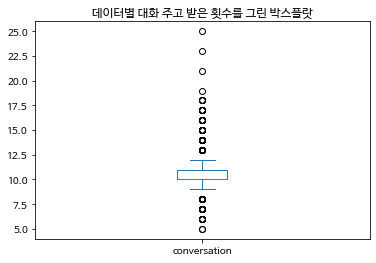

,conversation
count,3950.000000
mean,10.357722
std,1.181603
min,5.000000
25%,10.000000
50%,10.000000
75%,11.000000
max,25.000000


In [138]:
turn_counts = tunib_train["conversation"].apply(lambda x : len(x.split("\n")))
turn_counts.plot(kind="box")
plt.title("데이터별 대화 주고 받은 횟수를 그린 박스플랏")
plt.show()
pd.DataFrame(turn_counts).describe()

### AI_HUB 데이터 불러오기

AI_HUB데이터의 경우 저작권 이슈로 현재 repository에는 데이터를 업로드 하지 않은 상태이며 각 데이터셋마다 저장되어있는 파일 형식이나 데이터 구조가 다릅니다.

현재 사용되는 예재인 `한국어 대화` 데이터셋의 경우 xlsx 파일로 이루어져 있기에 엑셀 파일을 기준으로 불러오고, 불러온 데이터들이 최종적으로 모델에 입력되기 직전, 어떠한 형태로 변환시켜야 되는지 알려드리겠습니다.

In [109]:
aihub_data_paths

['/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/AI_HUB/여권 최종본(0416).xlsx',
 '/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/AI_HUB/상수도_최종본(0416).xlsx',
 '/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/AI_HUB/차량등록_최종본(0429).xlsx',
 '/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/AI_HUB/교통_최종본(0416).xlsx',
 '/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/AI_HUB/A 음식점(15,726)_new.xlsx',
 '/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/AI_HUB/B 의류(15,826)_new.xlsx',
 '/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/AI_HUB/C 학원(4,773)_new.xlsx',
 '/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/AI_HUB/E 생활서비스(11,087)_new.xlsx',
 '/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/AI_HUB/G 숙박업(7,113)_new.xlsx',
 '/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data

In [160]:
import re
from tqdm import tqdm

aihub_train = pd.DataFrame()
for data_path in tqdm(aihub_data_paths):
  sudo_df = pd.DataFrame()
  if not re.findall("[A-Z]", data_path.split("/")[-1]):
    tmp = pd.read_excel(data_path)
    sudo_df["conversation"] = tmp["question"] + "\n" +tmp["answer"]
    sudo_df["class"] = "일반 대화"
    aihub_train = pd.concat([aihub_train, sudo_df], axis = 0)
  else:
    tmp = pd.read_excel(data_path)
    # SENTENCEID 숫자 이외의 타입은 제거
    tmp_sentence = tmp[["SENTENCE", "SENTENCEID"]]
    print(tmp_sentence.shape)
    tmp_sentence = tmp_sentence[tmp_sentence['SENTENCEID'].apply(lambda x : type(x)) == int]
    print(tmp_sentence.shape)

    total_dataset = []
    # 대화별로 나눈 데이터셋 가져오기
    dataset = []
    small_case = []
    for idx, sen in enumerate(tmp_sentence["SENTENCE"]):
      present = tmp_sentence.iloc[idx, 1]
      try:
        next = tmp_sentence.iloc[idx+1, 1]
      except IndexError:
        pass
      gap = present - next
      if gap < 0:
        small_case += [sen]
      else:
        small_case += [sen]
        dataset += [small_case]
        small_case = []
    print(f"{data_path} 데이터셋 개수 : {len(dataset)}")
    total_dataset += dataset    
    total_dataset = list(map(lambda x : "\n".join(x), total_dataset))
    sudo_df["conversation"] = total_dataset
    sudo_df["class"] = "일반 대화"
    aihub_train = pd.concat([aihub_train, sudo_df], axis = 0)

aihub_train = aihub_train[aihub_train["conversation"].notnull()]

 31%|███       | 4/13 [00:01<00:04,  1.90it/s]

(15726, 2)
(15724, 2)


 38%|███▊      | 5/13 [00:07<00:19,  2.42s/it]

/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/AI_HUB/A 음식점(15,726)_new.xlsx 데이터셋 개수 : 839
(15826, 2)
(15824, 2)


 46%|████▌     | 6/13 [00:12<00:22,  3.27s/it]

/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/AI_HUB/B 의류(15,826)_new.xlsx 데이터셋 개수 : 1004
(4773, 2)
(4772, 2)


 54%|█████▍    | 7/13 [00:14<00:16,  2.70s/it]

/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/AI_HUB/C 학원(4,773)_new.xlsx 데이터셋 개수 : 842
(11087, 2)
(11083, 2)


 62%|██████▏   | 8/13 [00:17<00:14,  2.94s/it]

/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/AI_HUB/E 생활서비스(11,087)_new.xlsx 데이터셋 개수 : 722
(7113, 2)
(7112, 2)


 69%|██████▉   | 9/13 [00:19<00:10,  2.71s/it]

/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/AI_HUB/G 숙박업(7,113)_new.xlsx 데이터셋 개수 : 586
(8131, 2)
(8127, 2)


 77%|███████▋  | 10/13 [00:22<00:07,  2.66s/it]

/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/AI_HUB/I 부동산(8,131)_new.xlsx 데이터셋 개수 : 485
(4949, 2)
(4949, 2)


 85%|████████▍ | 11/13 [00:23<00:04,  2.29s/it]

/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/AI_HUB/H 관광여가오락(4,949)_new.xlsx 데이터셋 개수 : 392
(14949, 2)
(14947, 2)


 92%|█████████▏| 12/13 [00:28<00:03,  3.01s/it]

/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/AI_HUB/D 소매점(14,949)_new.xlsx 데이터셋 개수 : 1142
(7859, 2)
(7857, 2)


100%|██████████| 13/13 [00:30<00:00,  2.38s/it]

/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data/AI_HUB/F 카페(7,859)_new.xlsx 데이터셋 개수 : 524


TUNiB 훈련 데이터 개수 : 11969
                                        conversation  class
0  여권 기한이 다돼가지고 새로 재발급 해야되가지고요\n아 그러세요 선생님 그런 경우는...  일반 대화
1  여권 시간이 좀 돼 가지고 뭐 재 발급인가 아니면 뭐 다시 해야 될 낀데 어떻게 하...  일반 대화
2  여권연장 발급할라 카는데요\n아 그러시다면 요즘에는 예전처럼 여권 갱신이라는 의미가...  일반 대화
3  여권을 갱신하고 싶은데 거 어디로 가만 되지요\n지금 대구에서는 대구시청을 방문하셔...  일반 대화
4                    갱신이란 건 없습니까?\n예 그렇습니다. 신규 발급인데요  일반 대화




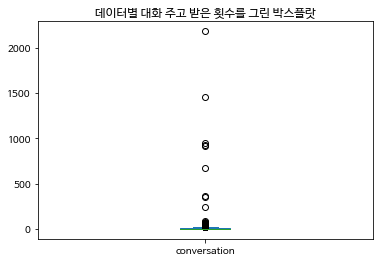

,conversation
count,11969.000000
mean,8.460272
std,30.293925
min,1.000000
25%,2.000000
50%,2.000000
75%,10.000000
max,2183.000000


In [161]:
print(f"TUNiB 훈련 데이터 개수 : {len(aihub_train)}")
print(aihub_train.head())
print("\n")
aihub_counts = aihub_train["conversation"].apply(lambda x : len(x.split("\n")))
aihub_counts.plot(kind="box")
plt.title("데이터별 대화 주고 받은 횟수를 그린 박스플랏")
plt.show()
pd.DataFrame(aihub_counts).describe()

TUNiB의 학습 데이터에서 주고 받는 대화의 횟수가 최소가 5번이고 최대가 25번이기 때문에 이에 맞춰서 AI_HUB 데이터를 선별해줍니다.

In [162]:
aihub_train = aihub_train[(aihub_counts >= 5) & (aihub_counts <= 25)]

결과적으로는 2개의 변수인 'conversation', 'class'로 이루어진 pandas dataframe과 같은 형태로 만들어 주어야 합니다.
- aihub_train의 class는 `일반 대화` 입니다.
- conversation의 주고 받는 대화는 `\n`으로 구분되어집니다.
- conversation에서 서로 대화를 주고 받는 횟수는 최소 5번, 최대 25번으로 제한해줍니다.

위의 조건에서 conversation에 해당하는 조건은 tunib_train에 있는 conversation과 최대한 유사한 대화 형식을 갖추기 위함입니다.

In [163]:
print(f"TUNiB 훈련 데이터 개수 : {len(aihub_train)}")
aihub_train.head()

TUNiB 훈련 데이터 개수 : 5117


,conversation,class
0,지금 배달되나요?\n아 네 배달됩니다\n짬뽕류는 어떤 게 있나요? 잘 나가는 짬뽕 ...,일반 대화
1,중국집 명성루죠? 배달 지금 가능한가요?\n예 배달 가능합니다\n주로 어떤 게 잘 ...,일반 대화
2,지금 배달 가능한가요?\n네 말씀 하세요\n네 제가 지금 전단지 보고 전화드리는 건...,일반 대화
3,수고하십니다 죄송하지만 배달되나요?\n네\n짬뽕이나 간짜장 중에 어떤 게 잘 나가나...,일반 대화
4,중국집 아닌가요 반점?\n예예 맞아요\n배달되나요?\n지금 끝났는데요 죄송해요\n아...,일반 대화


**최종적으로는 tunib_train과 aihub_train을 합친 데이터프레임을 csv 파일로 저장을 하거나 바로 모델의 입력에 넣을 수 있게 만들어 줍니다.**

In [164]:
total_train = pd.concat([tunib_train, aihub_train], axis = 0)
total_train = total_train.reset_index(drop=True)
print(f"TUNiB 훈련 데이터 개수 : {len(total_train)}")
total_train.head()

TUNiB 훈련 데이터 개수 : 9067


,class,conversation
0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [166]:
total_train.to_csv("./total_train.csv")

## 모델 클래스 및 함수 

#### 데이터 로딩 클래스

In [167]:
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter

class DataLoad():


  def __init__(self, data_path):
    self.dataset = pd.read_csv(data_path)


  def split(self, split_size):
    X = self.dataset["pre_conversation"]
    Y = self.dataset["class"]
    print(self.dataset.groupby("class").count().iloc[:,0])
    print(self.dataset.head())
    # 전체 데이터의 split_size 비율 만큼은 테스트, 검증 데이터입니다.
    x_train, x_val_test, y_train, y_val_test = train_test_split(X, Y, 
                                                            test_size = split_size, 
                                                            random_state = 200,
                                                            stratify = Y)
    # 테스트, 검증 데이터의 개수는 1:1의 비율을 가집니다.
    x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test,
                                                test_size = 0.5,
                                                random_state = 202,
                                                stratify = y_val_test)
    print(f"x_train 개수 : {len(x_train)}")
    print(f"y_train 개수 : {len(y_train)}")
    print(f"x_val 개수 : {len(x_val)}")
    print(f"y_val 개수 : {len(y_val)}")
    print(f"x_test 개수 : {len(x_test)}")
    print(f"y_test 개수 : {len(y_test)}")
    print(f"훈련 데이터 레이블 비율 확인 : {Counter(y_train)}")
    print(f"검증 데이터 레이블 비율 확인 : {Counter(y_val)}")
    print(f"테스트 데이터 레이블 비율 확인 : {Counter(y_test)}")
    return x_train.tolist(), x_val.tolist(), x_test.tolist(), y_train.tolist(), y_val.tolist(), y_test.tolist()

#### 기타 함수 

In [168]:
def id2label(x):
  # id에 맞는 실제 클래스로 변환시킵니다.
  if x == 0:
    return "협박 대화"
  elif x == 1:
    return "갈취 대화"
  elif x == 2:
    return "직장 내 괴롭힘 대화"
  elif x == 3:
    return "기타 괴롭힘 대화"
  elif x == 4:
    return "일반 대화"


def clf_score(y_test, y_pred):
  # 테스트 데이터에서 오분류된 데이터들의 idx를 리스트 타입으로 반환합니다.
  # classification report 
  false_list = [idx for idx, i in enumerate(y_test) if y_pred[idx] != i]
  print(f"모델이 틀린 데이터 개수 {len(false_list)}개")
  print(classification_report(y_test, y_pred))

  # confusion matrix
  conf_matrix = confusion_matrix(y_test, y_pred)
  names = ["협박", "갈취", "직장내 괴롭힘", "기타 괴롭힘", "일반"]
  conf_matrix = pd.DataFrame(conf_matrix, index = names, columns = names)
  sns.heatmap(conf_matrix, annot = True, fmt = "d")
  plt.title("Confusion Matrix")
  plt.xlabel("pred")
  plt.ylabel("true")
  plt.show()
  return false_list


def evaluate_result(score_list, x_test, y_pred, y_test):
  # 입력, 예측값, 실제값, 레이블별 score로 이루어진 판다스 데이터셋을 반환합니다.
  score_dataset = pd.DataFrame(score_list).add_prefix("label_")
  label_dataset = pd.DataFrame({"x_test":x_test, "y_pred":y_pred, "y_test":y_test})
  test_dataset = pd.concat([label_dataset, score_dataset], axis = 1)
  return test_dataset


def false_case_dataset(false_list, x_test, y_test, y_pred, print_example = False):
  # 오분류된 idx에 맞는 입력, 예측값, 실제값을 담은 리스트를 반환합니다.
  false_x_test = [x_test[i] for i in false_list]
  false_y_test = [y_test[i] for i in false_list]
  false_y_pred = [y_pred[i] for i in false_list]

  # 앞서 담은 리스트들을 판다스 데이터프레임 타입으로 변환시킵니다.
  false_dataset = pd.DataFrame({"text":false_x_test, "y_true":false_y_test, "y_pred":false_y_pred})
  # 숫자로된 id를 실제 레이블로 바꾸며 예시는 '0 -> 협박 대화' 입니다.
  false_dataset["y_true"] = false_dataset["y_true"].apply(lambda x : id2label(x))
  false_dataset["y_pred"] = false_dataset["y_pred"].apply(lambda x : id2label(x))

  # 오분류 예제의 내용을 보고 싶으면 print_example argument를 True로 바꿉니다.
  if print_example:
    for i in range(len(false_dataset)):
      sentence, prediction, real =false_dataset.iloc[i, :]
      print(f"예측 분류 : {prediction}")
      print(f"실제 분류 : {real}")
      print(sentence)
      print("\n")
  return false_dataset  


def save_csv(df, path, name):
  try:
    os.mkdir(path)
  except:
    pass
  new_path = os.path.join(path, name)
  df.to_csv(new_path)

#### Huggingface 모델 파이프라인 클래스

In [169]:
import os
import re
import tensorflow as tf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix
from transformers import TextClassificationPipeline
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, TFAutoModel


class TFGPT2ForSequenceClassification(tf.keras.Model):
  """
  GPT모델은 따로 출력층에 softmax 레이어를 추가해야 합니다.
  """
  def __init__(self, model_name, num_labels):
      super(TFGPT2ForSequenceClassification, self).__init__()
      self.gpt = TFAutoModel.from_pretrained(model_name, 
                                              from_pt=True)
      self.classifier = tf.keras.layers.Dense(num_labels,
                                              kernel_initializer=tf.keras.initializers.TruncatedNormal(0.02),
                                              activation='softmax',
                                              name='classifier')

  def call(self, inputs):
      outputs = self.gpt(input_ids=inputs)
      cls_token = outputs[0][:, -1]
      prediction = self.classifier(cls_token)

      return prediction


class TrainPipeline:
  def __init__(self, model_path, num_labels, batch_size = 16, epochs = 1):
    """
    Args:
      - model_path : Hugginface에서 사전학습된 모델들의 주소 str값을 받습니다.
      - num_labels : 분류되는 클래스의 개수 int값을 받습니다.
      - batch_size : 배치마다 들어가는 데이터의 개수 int값을 받습니다.
      - epochs : 모델이 학습하는 에폭 수 int값을 받습니다.
    Desc:
      - 데이터셋 구축, 모델 훈련, 저장, 검증의 과정을 거치는 훈련 파이프라인
    """
    self.model_path = model_path
    self.batch_size = batch_size
    self.epochs = epochs
    self.num_labels = num_labels
    self.tokenizer = AutoTokenizer.from_pretrained(self.model_path,
                                                   bos_token='</s>', 
                                                   eos_token='</s>', 
                                                   pad_token='<pad>')
    self.model = TFAutoModelForSequenceClassification.from_pretrained(self.model_path,
                                                                      num_labels = self.num_labels,
                                                                      from_pt=True)
    # https://stackoverflow.com/questions/69191305/how-to-add-new-special-token-to-the-tokenizer
    # 추가된 토큰에 맞게 vocab_size 재지정
    self.model.resize_token_embeddings(len(self.tokenizer))

  def dataset(self, X, Y, lstm = False):
    """
    Args:
      - X : 모델의 입력 변수로 str문장들로 구성된 list를 받습니다.
      - Y : 모델의 출력 변수로 id값으로 구성된 list를 받습니다.
      - lstm : lstm모델 여부를 결정하는 arg로 boolean을 받습니다.
    Desc:
      - 모델 학습에 들어가기 직전의 데이터셋으로 변환시켜주는 메소드입니다.
    Returns:
      - 모델이 GPT이면 (2D-array, 1D-array) 형태의 튜플을 반환합니다.
      - 모델이 BERT, LSTM이면 텐서플로우 데이터셋을 반환합니다.
    """
    # GPT 모델인 경우 넘파이로 반환시킵니다.
    if "GPT" in str(self.model):
      # 입력 변수 X의 원소에 차례대로 토큰화를 시키고 list에 넣습니다.
      input_ids, data_labels = [], []
      for example, label in tqdm(zip(X, Y), total=len(X)):
          bos_token = [self.tokenizer.bos_token]
          eos_token = [self.tokenizer.eos_token]
          tokens = bos_token + self.tokenizer.tokenize(example) + eos_token
          input_id = self.tokenizer.convert_tokens_to_ids(tokens)
          input_ids.append(input_id)
          data_labels.append(label)

      # X에 토큰화된 문장중에서 가장 긴 문장을 기준으로 패딩을 해줍니다.
      max_seq_len = max(map(lambda x : len(x), input_ids))
      input_ids = pad_sequences(input_ids, maxlen = max_seq_len, 
                                value = self.tokenizer.pad_token_id, 
                                padding='post')
      data_labels = np.array(data_labels)
      return input_ids, data_labels

    # BERT 모델인 경우 텐서플로우 데이터셋으로 반환시킵니다.
    if not lstm:
      encodings = self.tokenizer(X, truncation = True, padding = True)
      dataset = tf.data.Dataset.from_tensor_slices((dict(encodings), 
                                                          Y))
      dataset = dataset.shuffle(1000).batch(self.batch_size).prefetch(tf.data.experimental.AUTOTUNE)

    # LSTM 모델인 경우 텐서플로우 데이터셋으로 반환시킵니다.
    else:
      encodings = X
      dataset = tf.data.Dataset.from_tensor_slices((encodings, 
                                                    Y))
      dataset = dataset.shuffle(1000).batch(self.batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset    

  def training_dataset(self, train_dataset, val_dataset):
    """
    Args:
      - train_dataset : dataset 메소드를 거친 훈련 데이터셋을 받습니다.
      - val_dataset : dataset 메소드를 거친 검증 데이터셋을 받습니다.
    Desc:
      - 호출시킨 모델에 맞게 학습을 시키고 학습된 모델을 반환시켜줍니다.
    Returns:
      - 모델이 GPT면 학습된 subclass 모델을 반환합니다
      - 모델이 LSTM, BERT이면 학습된 functional 모델을 반환합니다.
    """
    optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
    losses = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

    
    # 모델이 GPT인 경우 앞서 선언된 subclass 모델을 가져와서 학습시킵니다.
    if "GPT" in str(self.model):
      x_train, y_train = train_dataset
      x_val, y_val = val_dataset
      num_labels = int(max(y_train) + 1)
      self.model = TFGPT2ForSequenceClassification(self.model_path,
                                              num_labels = num_labels)
      self.model.compile(optimizer = optimizer,
                        loss = losses,
                        metrics = ['accuracy'])
      self.model.fit(x_train, y_train,
                    epochs = self.epochs,
                    batch_size = self.batch_size,
                    validation_data = (x_val, y_val))
      return self.model

    # 모델이 LSTM, BERT인 경우 바로 학습시킵니다.
    else:
      self.model.compile(optimizer = optimizer,
                        loss = losses,
                        metrics = ['accuracy'])
      self.model.fit(train_dataset,
                    epochs = self.epochs,
                    batch_size = self.batch_size,
                    validation_data = val_dataset)
      return self.model 

  def evaluate_model(self, x_test):
    """
    Args:
      - x_test : LSTM, GPT모델이면 2-D array의 테스트 데이터를 받습니다.
    Desc:
      - 학습된 모델에 x_test를 예측한 점수와 클래스를 반환합니다.
    Returns:
      - LSTM, GPT 모델이면 (예측 점수 list, 클래스 1D-array)인 튜플을 반환합니다.
      - BERT 모델인 경우 (예측 점수 list, 클래스 list)인 튜플을 반환합니다.
    """
    predicted_label_list = []
    predicted_score_list = []
    
    # 테스트 데이터를 예측하는 모델이 LSTM 또는 GPT인 경우
    if "Functional" in str(self.model) or "GPT" in str(self.model):
      predicted_score_list = self.model.predict(x_test)
      y_pred = np.argmax(predicted_score_list, axis = -1)
      predicted_score_list = predicted_score_list.tolist()
    
    # 테스트 데이터를 예측하는 모델이 BERT인 경우
    else:
      clf_model = TextClassificationPipeline(
          tokenizer = self.tokenizer,
          model = self.model,
          framework = "tf",
          return_all_scores = True
          )
      for text in tqdm(x_test):
          preds_list = clf_model(text)[0]
          sorted_preds_list = max(preds_list, key=lambda x: x['score'])
          predicted_label_list.append(sorted_preds_list["label"]) # label
          predicted_score_list.append(list(map(lambda x : x['score'], preds_list))) # score
      y_pred = [int(label[-1]) for label in predicted_label_list]
    return predicted_score_list, y_pred
  
  def save_model_tokenizer(self, save_path):
    """
    Args:
      - save_path : 학습된 모델을 저장할 경로인 str를 받습니다.
    Desc:
      - save_path 경로에 폴더를 만들고 학습된 모델을 저장합니다.
    """

    # save_path에 맞는 새로운 경로를 만듭니다.
    try:
      os.mkdir(save_path)
    except:
      pass
    
    # 저장하는 모델이 GPT인 경우
    if "GPT" in str(self.model):
      folder_name = re.sub("/", "-", self.model_path)
      new_path = os.path.join(save_path, folder_name)
      self.model.save_weights('path_to_my_weights', save_format='tf')

    # 저장하는 모델이 LSTM인 경우
    elif "Functional" in str(self.model):
      new_path = os.path.join(save_path, "LSTM.h5", )
      self.model.save(new_path)
    
    # 저장하는 모델이 BERT인 경우
    else:
      folder_name = re.sub("/", "-", self.model_path)
      new_path = os.path.join(save_path, folder_name)    
      self.model.save_pretrained(new_path)
      self.tokenizer.save_pretrained(new_path)

# Main Huggingface 함수

In [ ]:
"""
완료
- "klue/bert-base"
- "skt/kogpt2-base-v2"
- "monologg/koelectra-base-v3-discriminator"
- "klue/roberta-base"
- "distilbert-base-multilingual-cased"
"""


# Huggingface에서 사용 가능한 사전학습 모델 리스트입니다.
model_paths = ["klue/bert-base"]      

# 변동 가능한 arguments로 save_path의 예시 : save_path = "./model/sample"
save_path = "./model/midterm" # 모델이 저장되는 위치
data_path = "./data/sample_data_v3.csv" # 학습 데이터 위치
word2vec_path = "../packages/ko.bin" # 사전 학습 임베딩 벡터 저장 위치
batch_size = 16 # 모델에 들어가는 배치 크기
epochs = 1 # 에폭 수


for model_path in model_paths:
  # TPU 작동을 위한 코드
  resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
  tf.config.experimental_connect_to_cluster(resolver)
  tf.tpu.experimental.initialize_tpu_system(resolver)
  strategy = tf.distribute.experimental.TPUStrategy(resolver)
  with strategy.scope():
    print(f"{model_path} 파이프라인 시작")

    # 데이터 로딩
    load = DataLoad(data_path)
    x_train, x_val, x_test, y_train, y_val, y_test = load.split(0.1)
    test_text = x_test.copy()
    num_labels = int(max(y_train) + 1)

    # # 데이터 증강
    # data_aug = DataAugmentation(x_train, y_train, word2vec_path)
    # # 데이터 증강 : 유의어 대체
    # sub_rep_x, sub_rep_y = data_aug.sub_rep_dataset(sub_ratio = 0.1)
    # # 데이터 증강 : 같은 레이블 반복
    # repeat_x, repeat_y = data_aug.label_repeat(label_id = 3)
    # # 증강된 데이터들 합치기
    # x_train = x_train + sub_rep_x + repeat_x
    # y_train = y_train + sub_rep_y + repeat_y

    # 데이터셋 구축
    pipeline = TrainPipeline(model_path, num_labels, batch_size, epochs)
    train_dataset = pipeline.dataset(x_train, y_train)
    val_dataset = pipeline.dataset(x_val, y_val)
    if "GPT" in str(pipeline.model):
      test_dataset = pipeline.dataset(x_test, y_test)
      x_test, y_test = test_dataset

    # 모델 학습, 예측, 저장
    model = pipeline.training_dataset(train_dataset, val_dataset)
    score_list, y_pred = pipeline.evaluate_model(x_test)
    pipeline.save_model_tokenizer(save_path)

    # 모델 검증    
    false_list = clf_score(y_test, y_pred)
    false_dataset = false_case_dataset(false_list, test_text, y_test, y_pred)
    eval_dataset = evaluate_result(score_list, test_text, y_pred, y_test)
    save_dataset_path = os.path.join(save_path, "eval_result")
    model_name = model_path.split("/")[-1]
    save_csv(eval_dataset, save_dataset_path, f"{model_name}.csv")
    
    print(f"{model_path} 파이프라인 종료\n")

In [174]:
cd ..

/content/drive/MyDrive/TUNiB준비반/AI_HUB_Select_baseline/data


In [ ]:
!git add 